In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data and store it into pandas DataFrame objects
df = pd.read_csv('./Datasets/train.csv', index_col='PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [3]:
df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

#Deletando instâncias que tenham valores faltando
df = df.dropna()

X = df.drop('Survived', axis=1)
y = df['Survived']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [4]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [5]:
# Visualize Decision Tree
from sklearn.tree import export_graphviz
target_names = np.unique(y)
columns = df.columns
# Creates dot file named tree.dot
export_graphviz(
            tree,
            out_file =  "tree_titanic.dot",
            class_names = str(target_names),
            feature_names = list(X.columns),
            filled=True,
            rounded=True)

# from subprocess import call

# call(['dot', '-T', 'png', 'tree_titanic.dot', '-o', 'tree_titanic.png'])

In [6]:
predicted = tree.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_score(y_test, predicted)

0.8324022346368715

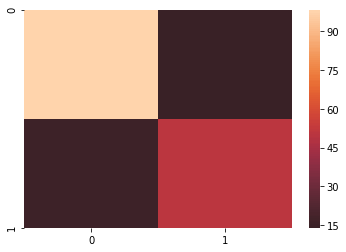

In [7]:
cm = confusion_matrix(y_test, predicted)
sns.heatmap(cm, center=True)
plt.show()

In [8]:
pd.DataFrame(
    confusion_matrix(y_test, predicted),
    columns=['Predicted Not Survival', 'Predicted Survival'],
    index=['True Not Survival', 'True Survival']
)

,Predicted Not Survival,Predicted Survival
True Not Survival,98,14
True Survival,16,51


In [9]:
report = classification_report(y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       112
           1       0.78      0.76      0.77        67

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

